In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funcs import *
from stats import *

from iminuit import Minuit
from iminuit.cost import LeastSquares, ExtendedBinnedNLL

In [2]:
CH1, CH2_2V, CH3 = get_data('data/Graetz_50hz_2V/')
CH1_10V, CH2_10V, CH3 = get_data('data/Graetz_50hz_10V/')
CH1_10V_quadra, CH2_10V_quadra, CH3 = get_data('data/Graetz_50hz_10V_quadra/')
CH1_10V_saw, CH2_10V_saw, CH3 = get_data('data/Graetz_50hz_10V_saw/')


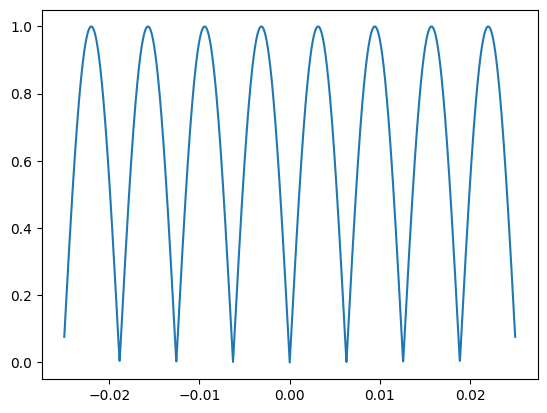

In [13]:
w = 500
y = [np.abs(-np.sin(w*i)) for i in CH2_10V[0]]
plt.plot(CH2_10V[0], y)

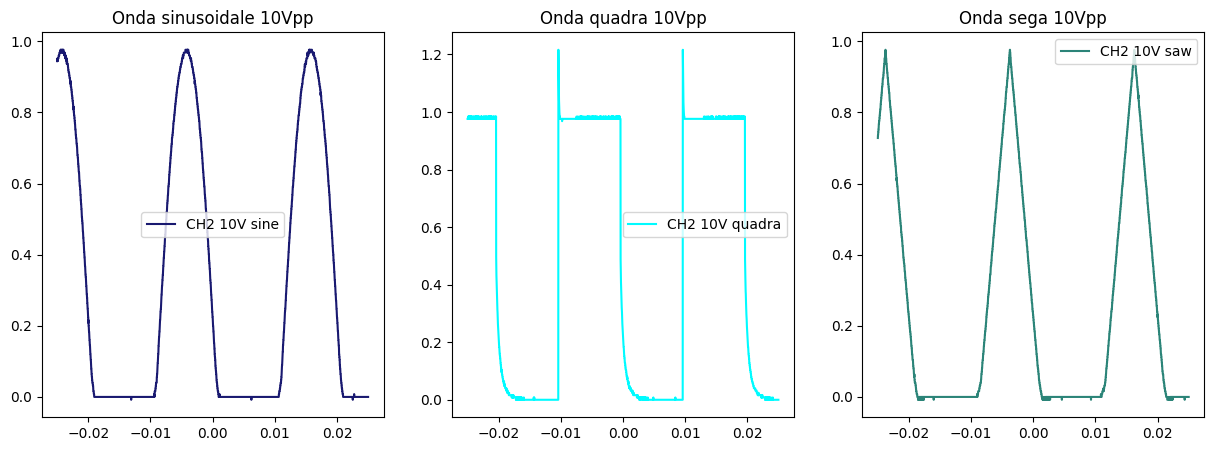

In [18]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Onda sinusoidale 10Vpp')
plt.plot(CH2_10V[0], -CH2_10V[1], label='CH2 10V sine', color='#191970')
plt.legend()

plt.subplot(1,3,2)
plt.title('Onda quadra 10Vpp')
# plt.plot(CH1_10V_quadra[0], CH1_10V_quadra[1], label='CH1 10V quadra')
plt.plot(CH2_10V_quadra[0], -CH2_10V_quadra[1], label='CH2 10V quadra', color='#00fbff')
plt.legend()

plt.subplot(1,3,3)
plt.title('Onda sega 10Vpp')
# plt.plot(CH1_10V_saw[0], CH1_10V_saw[1], label='CH1 10V saw')
plt.plot(CH2_10V_saw[0], -CH2_10V_saw[1], label='CH2 10V saw', color='#2b8478')
plt.legend()

plt.savefig('imgs/Graetz/Graetz_all.pdf', bbox_inches='tight')

In [107]:
def sin(t, A, T, phi):
    a = A*np.sin(2*np.pi*t/T + phi)
    a = [i if i > 0 else 0 for i in a]
    return a

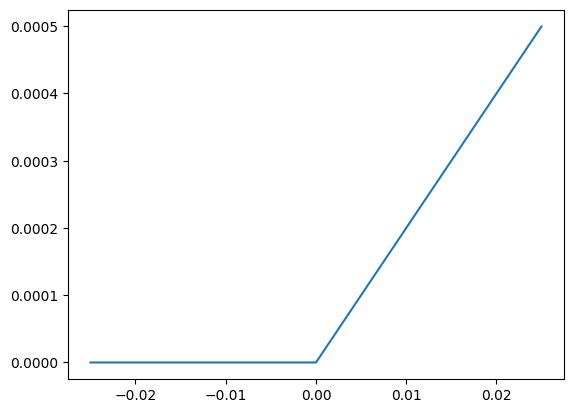

In [106]:
x = CH2_10V[0]
y = sin(x, 1, 0.02, 0)
plt.plot(x, y)

In [115]:
c = LeastSquares(CH2_10V[0], -CH2_10V[1], .1, sin)
m = Minuit(c, A=1, T=0.02, phi=0.01)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.03 (χ²/ndof = 0.0)      │              Nfcn = 138              │
│ EDM = 1.55e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   0.967   │   0.004   │            │            │         │         │       │
│ 1 │ T    │ 20.003e-3 │ 0.018e-3  │            │            │         │         │       │
│ 2 │ phi  │   2.896   │   0.004   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬────────────────────────────┐
│     │        A        T      phi │
├─────┼────────────────────────────┤
│   A │ 1.54e-05  6.80e-9 0.002e-3 │
│   T │  6.80e-9 3.42e-10  3.26e-9 │
│ phi │ 0.002e-3  3.26e-9 1.73e-05 │
└─────┴────────────────────────────┘

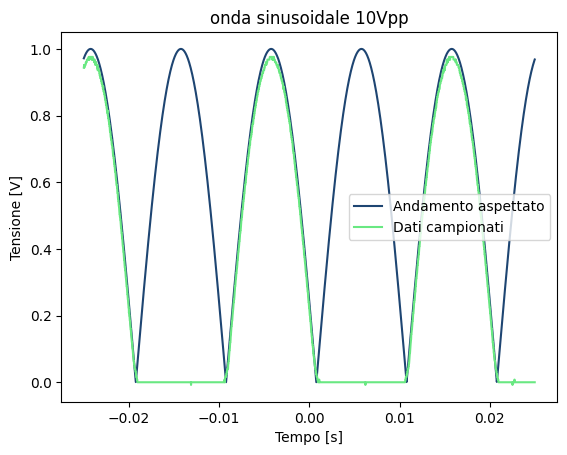

In [127]:
plt.title('onda sinusoidale 10Vpp')
y = np.abs(np.sin(CH1_10V[0]*2*np.pi/m.values['T'] + m.values['phi']))
plt.plot(CH1_10V[0], y, label='Andamento aspettato', c='#1e4572')
plt.plot(CH2_10V[0], -CH2_10V[1], label='Dati campionati', c='#69e882')
plt.xlabel('Tempo [s]')
plt.ylabel('Tensione [V]')
plt.legend()
plt.savefig('imgs/Graetz/Graetz_confronto.pdf', bbox_inches='tight')

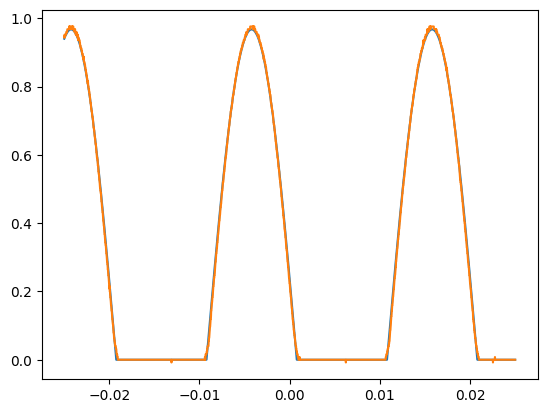

In [112]:
plt.plot(CH2_10V[0], sin(CH2_10V[0], *m.values), label='Fit')
plt.plot(CH2_10V[0], -CH2_10V[1], label='Data')